In [2]:
#reading the library for fread
library(data.table);
print("done");

[1] "done"


In [18]:
#reading in the data
x <- fread("gunzip -c Intervals_092014_012016.csv.gz",
           header=TRUE,sep=",",na.strings="",nrows = 500000, skip=0);

#currently only 500 000 rows will read in before error
#reading in gunzipped file results can achieved about 55 000 000 rows
print("done");

[1] "done"


In [61]:
#omit bad data
x <- na.omit(x);

#figure out how many of each reading is present
print(table(table(x[,1])))

#pull out the ids of all the entries with enough data
#still figuring out how to actually pull out that number from above
good = names(table(x[,1]))[table(x[,1])==2880];

#filtering out data with wrong number of points 
mm=match(as.matrix(x[,1]),good)
str(mm)
x1 = x[!is.na(mm),]

#scaling data for analysis
x1[,5] <- scale(x1[,5])

print("done")


2112 2432 2880 5760 
   1    1  156    8 
 int [1:499904] 1 1 1 1 1 1 1 1 1 1 ...
[1] "done"


In [62]:
dim(x1)
print(x1)

[1] 449280      5

        MR_MDVC_NUMBER START_READ END_READ        INTERVAL_TIME INTERVAL_READ
     1:      123053022   8485.763 8498.414 01-SEP-2014 00:15:00    -0.1492121
     2:      123053022   8485.763 8498.414 01-SEP-2014 00:30:00    -0.3416238
     3:      123053022   8485.763 8498.414 01-SEP-2014 00:45:00    -0.1788139
     4:      123053022   8485.763 8498.414 01-SEP-2014 01:00:00     0.1912087
     5:      123053022   8485.763 8498.414 01-SEP-2014 01:15:00     0.3170164
    ---                                                                      
449276:      123053238   1482.001 1482.001 30-SEP-2014 23:00:00    -0.7585159
449277:      123053238   1482.001 1482.001 30-SEP-2014 23:15:00    -0.7585159
449278:      123053238   1482.001 1482.001 30-SEP-2014 23:30:00    -0.7585159
449279:      123053238   1482.001 1482.001 30-SEP-2014 23:45:00    -0.7585159
449280:      123053238   1482.001 1482.001 01-OCT-2014 00:00:00    -0.7585159


In [91]:
res = c();
#assembling the matrix
#156 is the number of different valid identity
#2880 is the number of entries for each identity
for(i in 1:156){
    res = cbind(res, as.matrix(x1[((i-1)*2880+1):(i*2880),5]))
}
res = t(res)

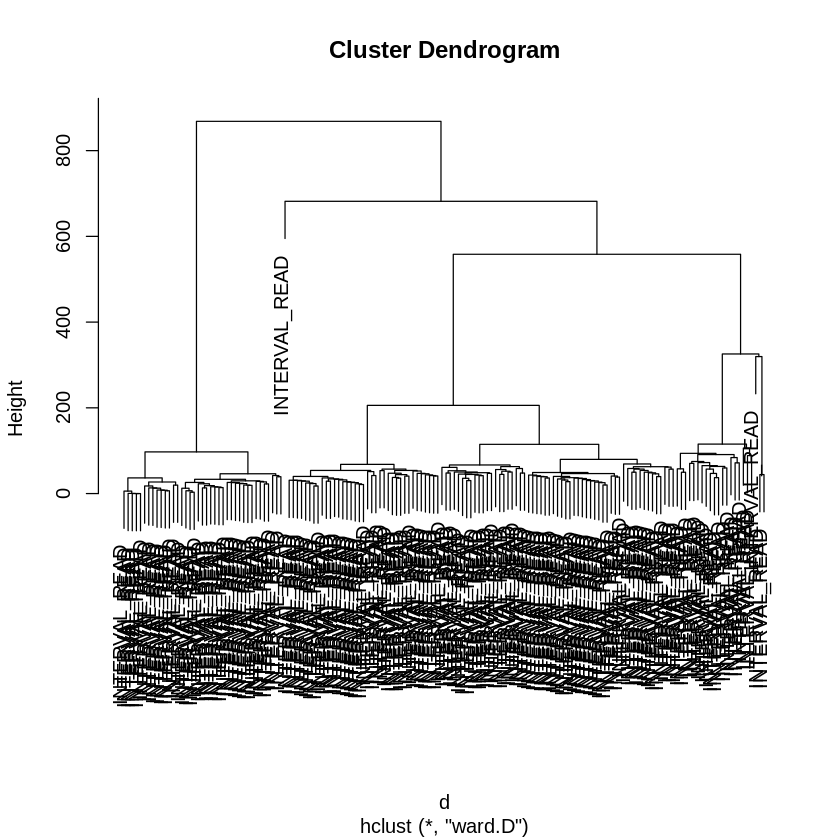

In [87]:
#hierarchical clustering
d <- dist(res, method = "euclidean")
fit <- hclust(d, method="ward.D") 
plot(fit) # display dendogram

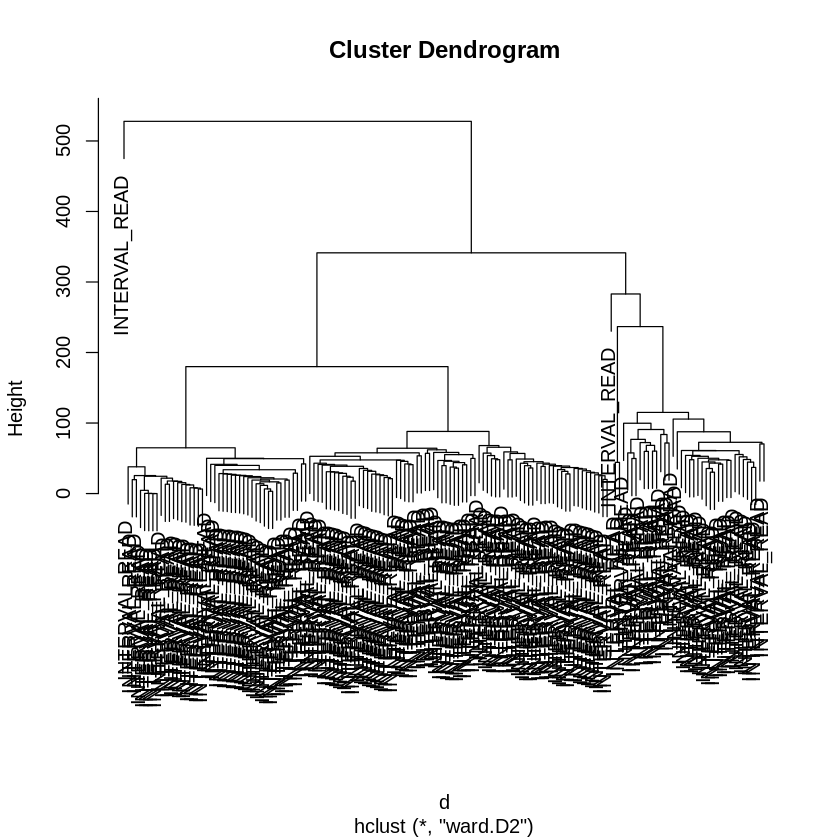

In [90]:
fit <- hclust(d, method="ward.D2") 
plot(fit) # display dendogram

In [109]:
#This Section begins tclustering as hourly averages for each day
x <- fread("HourlyAvgs.csv",
           header=TRUE,sep=",",na.strings="");
print("done")

[1] "done"


In [98]:
x <- na.omit(x)
str(x)

Classes 'data.table' and 'data.frame':	25743 obs. of  25 variables:
 $ Id: chr  "123053022" "123053024" "123053025" "123053026" ...
 $ 0 : num  0.1181 0.1002 0.1095 0.241 0.0843 ...
 $ 1 : num  0.105 0.0957 0.0989 0.197 0.0674 ...
 $ 2 : num  0.0997 0.0947 0.1002 0.1755 0.0613 ...
 $ 3 : num  0.0915 0.0886 0.0977 0.1691 0.0606 ...
 $ 4 : num  0.0886 0.0823 0.1092 0.1666 0.0608 ...
 $ 5 : num  0.0994 0.1023 0.0975 0.1605 0.0604 ...
 $ 6 : num  0.1059 0.2464 0.0982 0.1707 0.0724 ...
 $ 7 : num  0.1125 0.2826 0.1215 0.2027 0.0617 ...
 $ 8 : num  0.1101 0.3456 0.2221 0.118 0.0323 ...
 $ 9 : num  0.101 0.278 0.156 0.117 0.158 ...
 $ 10: num  0.0966 0.1939 0.1418 0.2657 0.2951 ...
 $ 11: num  0.114 0.181 0.161 0.347 0.337 ...
 $ 12: num  0.115 0.19 0.186 0.392 0.365 ...
 $ 13: num  0.127 0.162 0.212 0.364 0.329 ...
 $ 14: num  0.127 0.169 0.187 0.28 0.292 ...
 $ 15: num  0.133 0.197 0.194 0.188 0.242 ...
 $ 16: num  0.135 0.207 0.156 0.118 0.173 ...
 $ 17: num  0.1879 0.2807 0.1767 0.1953 0.

In [105]:
mat = as.matrix(x[,2:25])
print("done")

[1] "done"


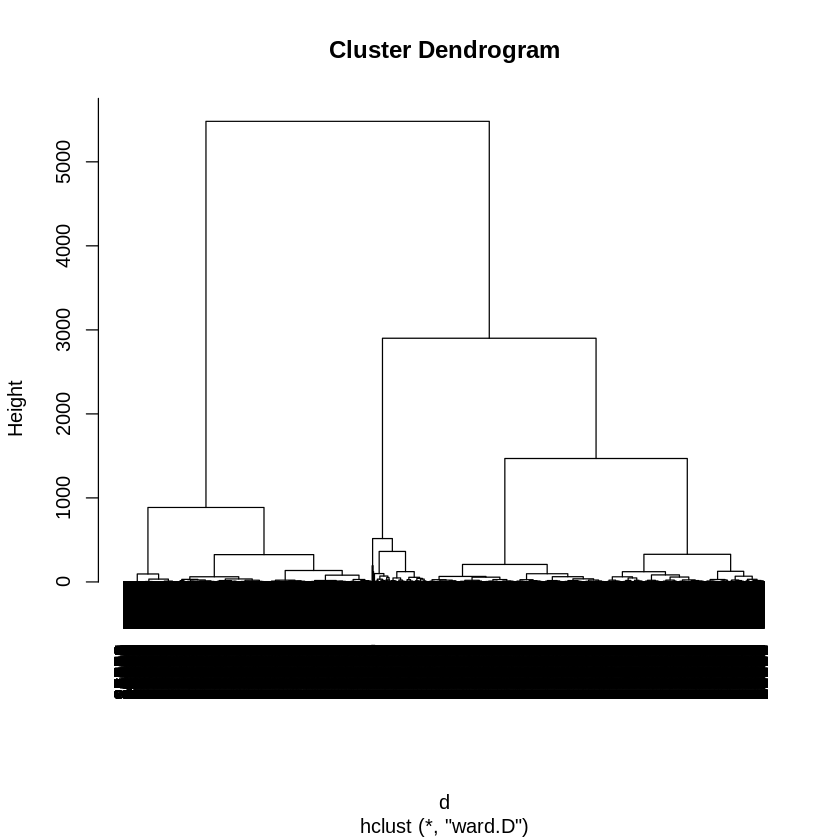

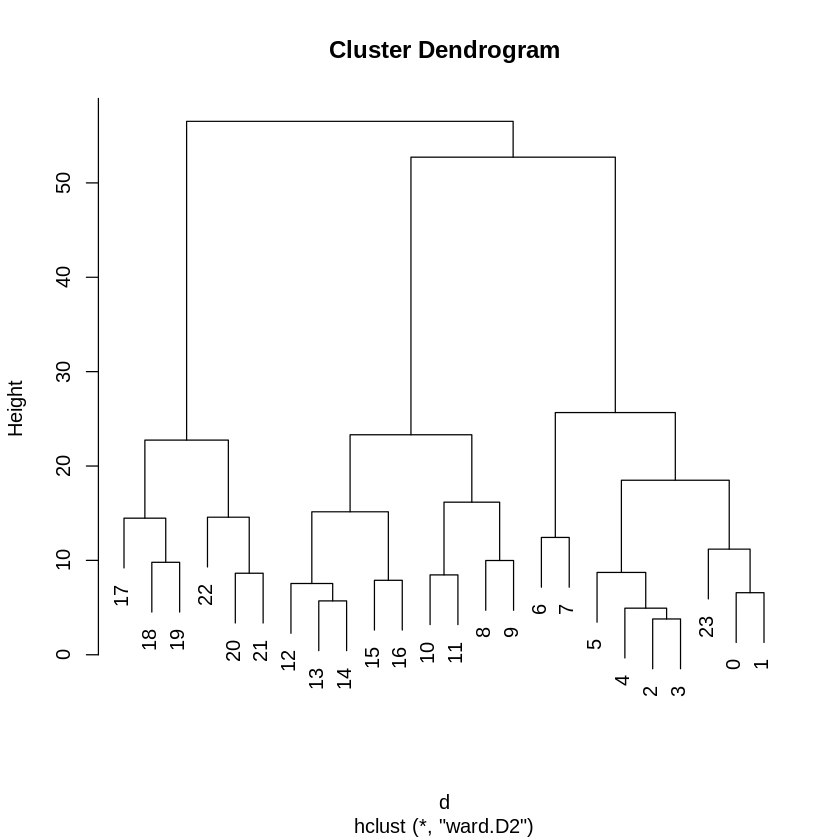

In [108]:
d <- dist(mat, method = "euclidean")
fit <- hclust(d, method="ward.D") 
plot(fit) # display dendogram
d <- dist(t(mat), method = "euclidean")
fit <- hclust(d, method="ward.D2") 
plot(fit) # display dendogram

In [110]:
#this sections deals with weekly day averages
x <- fread("WeeklyDayAvgs.csv",
           header=TRUE,sep=",",na.strings="");
print("done")

[1] "done"


In [111]:
x <- na.omit(x)
str(x)

Classes 'data.table' and 'data.frame':	25402 obs. of  8 variables:
 $ Id: chr  "123053022" "123053024" "123053025" "123053026" ...
 $ 0 : num  0.143 0.191 0.158 0.224 0.135 ...
 $ 1 : num  0.152 0.216 0.169 0.246 0.152 ...
 $ 2 : num  0.156 0.212 0.17 0.221 0.127 ...
 $ 3 : num  0.155 0.202 0.159 0.281 0.152 ...
 $ 4 : num  0.113 0.194 0.164 0.248 0.157 ...
 $ 5 : num  0.112 0.184 0.175 0.243 0.157 ...
 $ 6 : num  0.121 0.198 0.145 0.217 0.129 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [112]:
mat = as.matrix(x[,2:8])
print("done")

[1] "done"


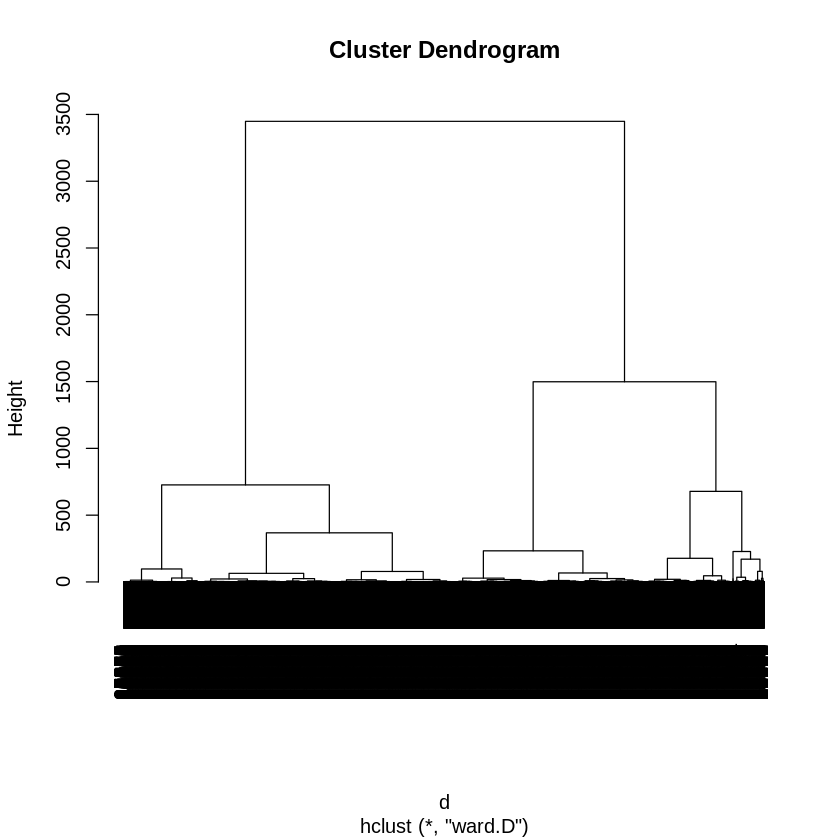

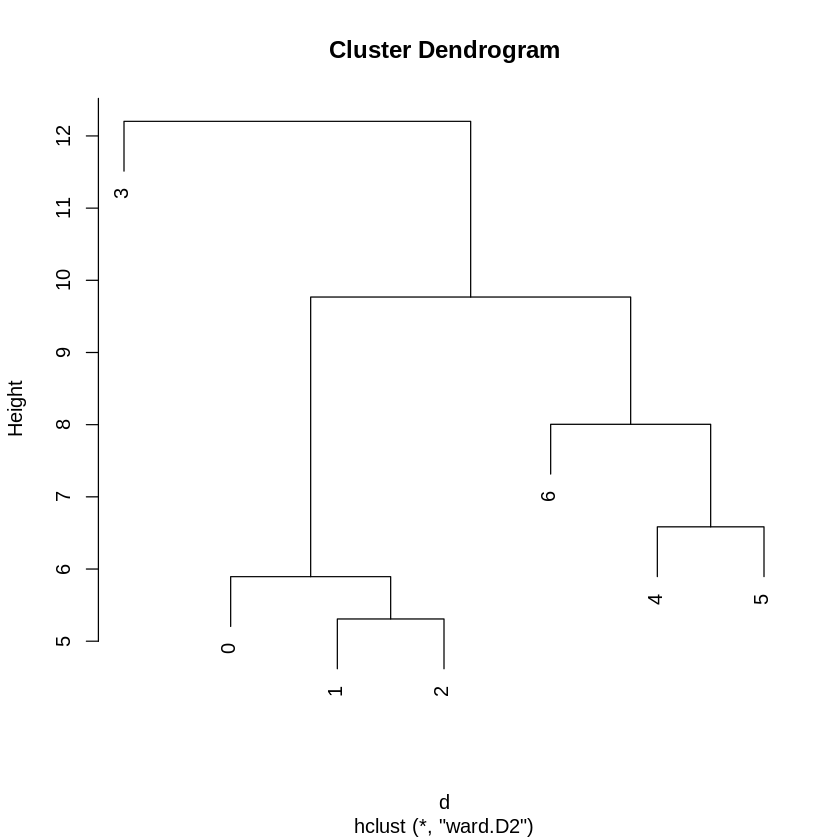

In [114]:
d <- dist(mat, method = "euclidean")
fit <- hclust(d, method="ward.D") 
plot(fit) # display dendogram
d <- dist(t(mat), method = "euclidean")
fit <- hclust(d, method="ward.D2") 
plot(fit) # display dendogram

In [116]:
#This Section begins clustering as hourly averages for each over a week
x <- fread("WeeklyHourAvgs.csv",
           header=TRUE,sep=",",na.strings="");
print("done")

[1] "done"


In [117]:
x <- na.omit(x)
str(x)

Classes 'data.table' and 'data.frame':	24911 obs. of  169 variables:
 $ Id : chr  "123053022" "123053024" "123053025" "123053026" ...
 $ 0  : num  0.097 0.0838 0.1029 0.2293 0.0749 ...
 $ 1  : num  0.109 0.0828 0.0961 0.1892 0.0619 ...
 $ 2  : num  0.1008 0.0867 0.0965 0.1782 0.0624 ...
 $ 3  : num  0.0851 0.0821 0.0883 0.1683 0.0629 ...
 $ 4  : num  0.0753 0.0797 0.1075 0.1605 0.0617 ...
 $ 5  : num  0.1034 0.0841 0.0962 0.1494 0.0604 ...
 $ 6  : num  0.089 0.2425 0.0989 0.1805 0.0761 ...
 $ 7  : num  0.0852 0.3104 0.1269 0.2044 0.0654 ...
 $ 8  : num  0.0994 0.3208 0.2548 0.0996 0.0312 ...
 $ 9  : num  0.0954 0.3459 0.1722 0.1357 0.1684 ...
 $ 10 : num  0.0982 0.1713 0.1641 0.2373 0.272 ...
 $ 11 : num  0.105 0.13 0.167 0.293 0.303 ...
 $ 12 : num  0.104 0.172 0.172 0.371 0.344 ...
 $ 13 : num  0.0972 0.1441 0.1909 0.3737 0.3465 ...
 $ 14 : num  0.119 0.176 0.2 0.164 0.207 ...
 $ 15 : num  0.122 0.178 0.211 0.132 0.211 ...
 $ 16 : num  0.113 0.2 0.144 0.133 0.173 ...
 $ 17 : num  0.1

In [118]:
mat = as.matrix(x[,2:169])
print("done")

[1] "done"


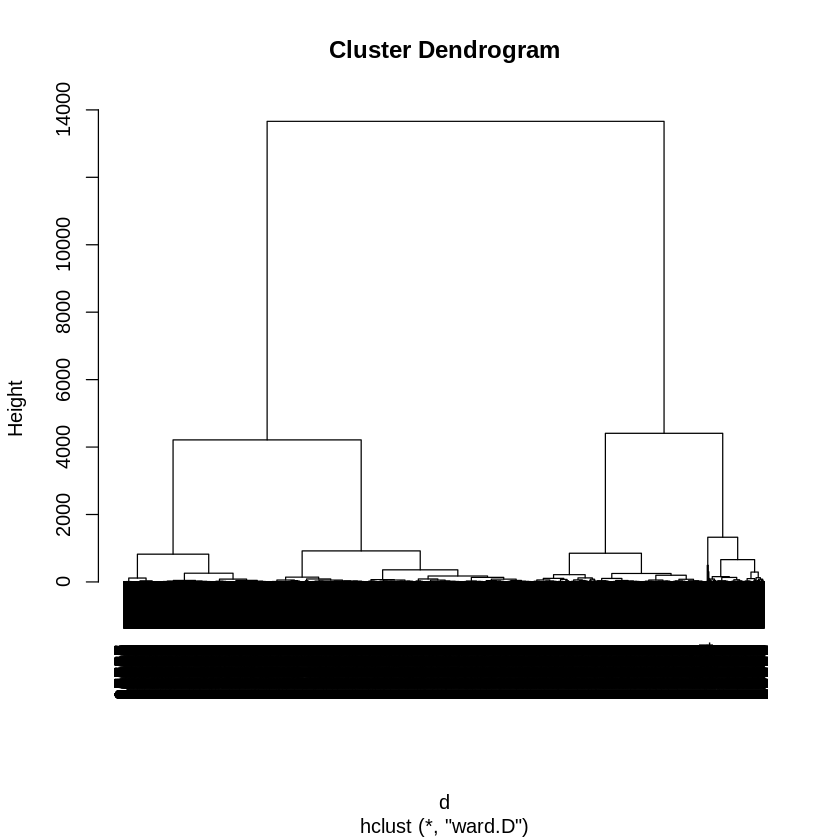

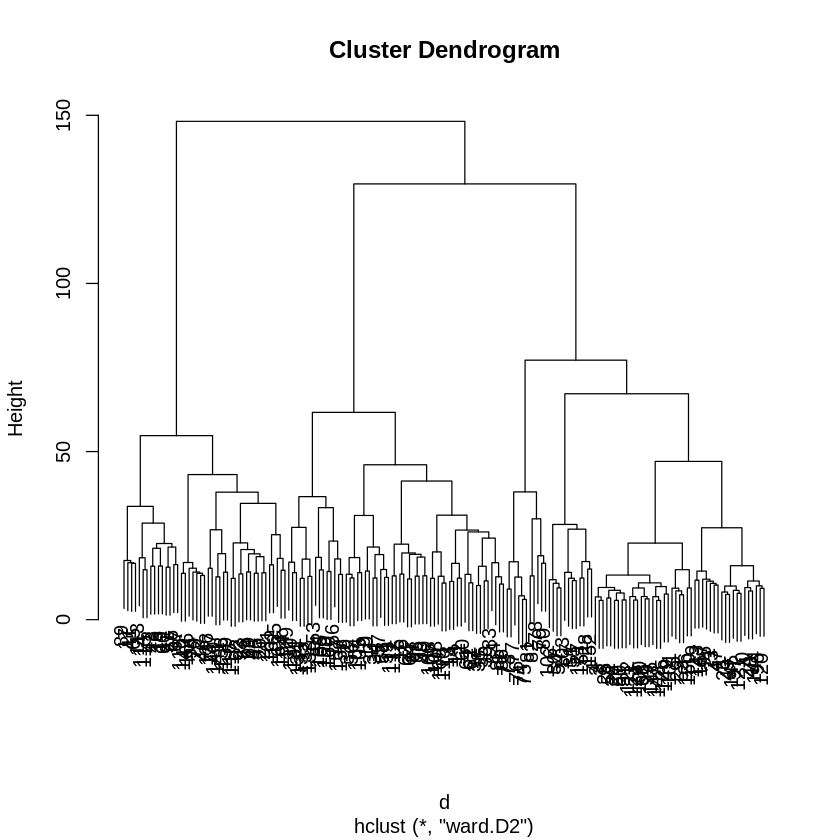

In [119]:
d <- dist(mat, method = "euclidean")
fit <- hclust(d, method="ward.D") 
plot(fit) # display dendogram
d <- dist(t(mat), method = "euclidean")
fit <- hclust(d, method="ward.D2") 
plot(fit) # display dendogram